# Statistics and Machine Learning

## Statistics

 * Statistics as a field is concerned with learning from data
 * Making inferences about a population given a sample
 * Quantifying uncertainty
 * Testing hypotheses
 

#### Two main types:

 * Descriptive Statistics:
     * Mean, Standard Deviation, correlation, etc.
 * Inferential Statistics:
     * Deriving Estimates
     * Trying to determine the underlying probability distribution of a phenomenon
     * Hypothesis Testing

#### Ultimately, Statistics contains tools concerned with explaining data

## Machine Learning

 * Machine Learning is a field concerned about learning from data
 * Making **predictions** on unseen data
 * Learning how to represent data effectively 
 
 > Machine learning (ML) is a field of artificial intelligence that uses statistical techniques to give computer systems the ability to "learn" (e.g., progressively improve performance on a specific task) from data, without being explicitly programmed.


![](./assets/ml.png)

![](./assets/hype.png)

![](./assets/esl.png)

#### Not always friendly

![](./assets/twocultures.png)

![](./assets/abstract.png)

# Modeling

A statistical or machine learning model is a mathematical representation of data and associated outcomes

 * Simplification of complex processes that allows us to reason or make predictions
 * Often probabilistic in nature
 * Models have parameters which need to be fit often indicated using the symbol $\theta$


![](./assets/box.jpg)

![](./assets/map.png)

![](./assets/blackbox.png)

![](./assets/statisticsmodels.png)

### Validation:
 * Goodness of Fit
 * Residual Analysis

![](./assets/algorithmic.png)

### Validation:
* Predictive Preformance

# Example:

#### Let's say we flip a coin 13 times and the results are as follows:

In [1]:
results = [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]

sum(results)

5

Our first step is to define a model for how the data was generated. A natural model for binary data like this is the bernoulli model, which we have seen. The Bernoulli distribution is given by:

$$ P(X = 1) = \theta $$
$$ P(X = 0) = 1- \theta $$

$$ P(x) = \theta^x(1-\theta)^{1-x} $$

$$ X \stackrel{iid}{\sim} Bern(\theta) $$

How do we *estimate* the value of $\theta$?

How do we *fit* the model?

## Statistical Approach

Start by defining a **likelihood function**

A **Likelihood function** is a function of the parameters of the model *given* observed data which expresses how *likely* or *probable* the data observed are for different values of the parameters

In this case, since we know that each coin flip is independent and identically distributed, we can saw that the likelihood of seeing the results that we've seen for different values of $\theta$ can be written as:

$$ L(\theta|x) = \prod_{i=1}^{n} \theta^{x_i}(1-\theta)^{1-x_i} $$

*Is this a probability distribution?*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def compute_bernoulli_likelihood(num_success, total_num, p):
    likelihood = (p**num_success) * (1-p)**(total_num - num_success)
    return likelihood

In [4]:
thetas = np.linspace(0, 1, 10000)

In [5]:
likelihoods = [compute_bernoulli_likelihood(5, 13, x) for x in thetas]

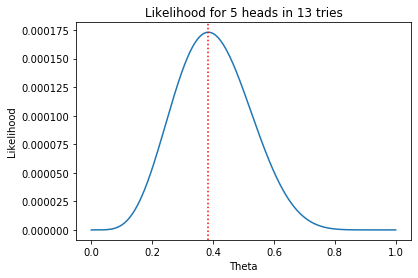

In [6]:
fig, axes = plt.subplots()
axes.plot(thetas, likelihoods)
axes.set(title = "Likelihood for 5 heads in 13 tries",
            xlabel = "Theta",
            ylabel = "Likelihood")
axes.axvline(5./13., linestyle = ":", color = "red")


## Deriving the maximum likelihood estimate

Need to maximize this:

$$ L(\theta|x) = \prod_{i=1}^{n} \theta^{x_i}(1-\theta)^{1-x_i} $$


Let's make it easier:

### The log-likelihood

It is often easier to find the maximum of the log-likelihood than it is to find the maximum of the likelihood.

Also, numerical underflow issues can be prevented

When you take the logarithm, products become sums!

$$\lambda(\theta|x) = ln L(\theta|x)$$

In [8]:
x = np.linspace(0.0001, 1, 10000)
y = np.log(x)

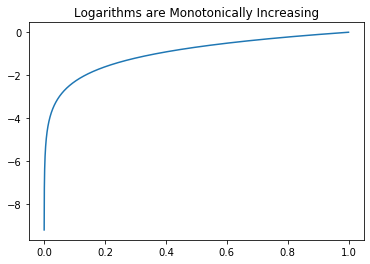

In [9]:
plt.plot(x, y)
plt.title("Logarithms are Monotonically Increasing")
plt.show()

$$ \lambda(\theta|x) = ln(\prod_{i=1}^{n}\theta^x(1-\theta)^{1-x_i})$$

$$ \lambda(\theta|x) = \ln(\theta) \Sigma_{i=1}^{n}x_i + ln(1-\theta)\Sigma_{i=1}^{n}(1-x_i)$$

We can find the maximum by setting the derivative of the log-likelihood to 0 and solving for $\theta$

$$\frac{d\lambda(\theta|x)}{d\theta} = \frac{\Sigma(x_i)}{\theta} - \frac{\Sigma(1-x_i)}{1-\theta} = 0$$

$$\Sigma{x_i} - \theta\Sigma{x_i} = \theta\Sigma(1-x_i)$$

$$\Sigma{x_i} = \theta(n)$$

$$\theta = \Sigma\frac{x_i}{n} $$
Note that this is just the observed proportion of heads!

## Machine Learning Approach

Remember that Machine Learning is concerned with prediction. Many machine learning models approach fitting models and parameters with a *loss function*.

A *loss function* represents a cost for getting a *prediction* incorrect. In this case, we are interested in predicting future coin flips (this is an overly simplistic model - most machine learning models include hundreds of parameters).

For these types of problems, where we are trying to classify a coin flip as a 1 or 0 (known as a binary classification problem), we will use the *cross-entropy* loss.

## Cross-entropy loss

$$ loss = -(ylog(p) + (1-y)log(1-p)) $$

Where y = 1 if the coin flip is heads and y = 0 if the coin flip is tails. (As a note, sometimes machine learning uses +1 and -1 to denote classes rather than the classical 1 and 0 -- how would this change the loss?)

## Exercise: 
> Graph this function for values of the predicted value p when y is 0 and when y is equal to 1

We want to *minimize* this loss over our dataset. If you notice, this is very similar to the likelihood approach! In fact, in this case,  maximizing the log-likelihood and minimizing this loss function yield the exact same estimate for $\theta$ or $p$

# Linear Regression

One of the simplest models for modeling a relationship in data is linear regression. It has been used in both statistics and machine learning, but its history is mostly rooted in statistics.

In fact, there is an entire subfield of statistics known as regression analysis.


#### So what is it?

A linear regression uses the linear equation:

$$ y = mx + b $$ where $m$ and $b$ are the parameters of the model, $x$ is some real-value input, and $y$ is a real-valued output. The goal is to find the parameters $m$ and $b$ that best fit the data. Instead of $m$ and $b$, usually statisticians will use $\beta$ instead. So 

$$ y = mx + b $$ 

becomes 
$$ y = \beta_0 + \beta_1x + \epsilon_i$$, where $\epsilon_i$ are independently distributed according to $N(0, \sigma^2)$

This is pretty limited if $x$ is just one-dimensional, so linear regression often extends to multiple dimensions, where it is known as multivariate regression, or multiple linear regression.

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 ... $$

Some terminology:
    
In statistics, $\beta_0$ is known as an intercept, and $\beta_1$ is called a covariate, or independent variable. 

In [11]:
import pandas as pd
import statsmodels.api as sm
diabetes_df = pd.read_csv("../Assignments/hw2/data/diabetic_data.csv")

# Let's say we have a really simple model:

`num_lab_procedures = intercept + num_medications`

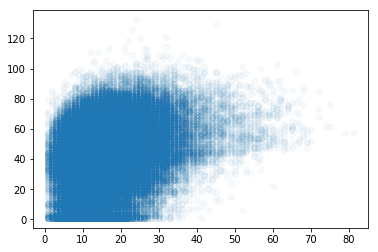

In [14]:
plt.scatter(diabetes_df['num_medications'].values, diabetes_df['num_lab_procedures'].values, alpha = 0.03)

In the likelihood-based approach, we would have to come up with a likelihood function, and then maximize it given our data.

Another way to formulate the linear regression model is to do so probabilistically.

$$y|X \sim N(\beta_0 + \beta_1x_1, \sigma^2I_n)$$

Then, we simply have to find the maximum likelihood estimate of this:

## Likelihood

$$\prod_{i=1}^n p(y_i|x_i;b_0, b_1, s^2) = \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi s^2}}e^{-{\frac{y_i - (b_0 + b_1x_i)^2}{2s^2}}} $$

Ok, how about another way?

It turns out that you can get the closed form solutions to this problem (if you assume normal errors), by using the OLS solution.

Here, we say that 

$$ \textbf{x} = \begin{bmatrix}1\\ x_1\end{bmatrix}$$
$$ \boldsymbol{\beta} = \begin{bmatrix}\beta_0 \\ \beta_1 \end{bmatrix} $$

so we can write:

$$ y_i = \boldsymbol{\beta}^T\boldsymbol{x_i}$$

In the OLS solution, we know that

$$ \boldsymbol{\beta} = (X^TX)^{-1}X^Ty$$

Where X is the matrix

$$ \begin{bmatrix}1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \end{bmatrix}$$ and so on.

This is called the *design matrix* in statistics

In [15]:
y = diabetes_df['num_lab_procedures'].values
x = np.column_stack((np.ones((diabetes_df.shape[0])), diabetes_df['num_medications'].values))

In [16]:
print(x)
x.shape

[[ 1.  1.]
 [ 1. 18.]
 [ 1. 13.]
 ...
 [ 1.  9.]
 [ 1. 21.]
 [ 1.  3.]]


(101766, 2)

In [17]:
print(y)
y.shape

[41 59 11 ... 53 45 13]


(101766,)

In [18]:
np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x), x)), np.transpose(x)), y)

array([32.69529799,  0.6491352 ])

In [20]:
model = sm.OLS(y, x).fit()

In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     7885.
Date:                Thu, 07 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:41:23   Log-Likelihood:            -4.4380e+05
No. Observations:              101766   AIC:                         8.876e+05
Df Residuals:                  101764   BIC:                         8.876e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.6953      0.131    248.949      0.0

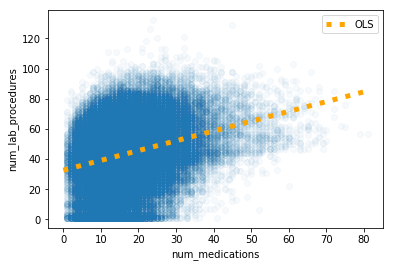

In [22]:
plt.scatter(diabetes_df['num_medications'].values, diabetes_df['num_lab_procedures'].values, alpha = 0.03)
plt.plot([0, 80], [32.69529799, 32.69529799 + 0.6491 * 80], linestyle = ":", color = "orange", linewidth = 5, label = "OLS")
plt.legend()
plt.xlabel('num_medications')
plt.ylabel('num_lab_procedures')
plt.show()

#### Assumptions:

In statistics, because regression analysis often assumes that the linear model actually represents the data generation process, there are assumptions that need to be made.

 * There is a linear relationship between the variables
 * The predictor (independent, covariate) variables are not too correlated with each other (multicollinearity)
 * Homoscedasticity (equal variance of dependent variable for all values)
 * The errors $\epsilon$ are indepdently distributed (no autocorrelated errors)


#### Model Checking
How to check how well the model fits:

$R^2$ proportion of variance explained

*F-tests* Is your model different than a null model

Check residuals:

![](./assets/residualanalysis.png)

#### Analysis:

An analysis in a statistical setting would be to say that according to the model, 1 unit increase in number of medications a patient is taking is associated with approximately a 0.6491 increase in the number of lab procedures a patient is taking.


## Machine Learning approach

In machine learning, we usually use the following notation:

$$ y = \textbf{w}^Tx $$

where $$\textbf{w} = \begin{bmatrix} b \\ w \end{bmatrix}$$

where $\textbf{w}$ are known as weights, and intercepts, denoted by $b$, are known as a bias term.



### Fit the model:

Start with a loss function. Here we will use the mean squared error loss, which is given by:

$$ loss =  \frac{1}{N}\Sigma_{i=1}^{n}(y_i - (\textbf{w}^Tx_i))^2$$

By minimizing this function with respect to b and w, we obtain the exact same estimate as the OLS solution. We will go into details next week.

#### Model Checking:

How well do you predict new cases?